## Import Main Libraries

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns 
import os
import joblib
import missingno


from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBRegressor

## Read and overview the dataset

In [159]:
data_path = os.path.join(os.getcwd(), 'housing.csv')
data_path
df_housing = pd.read_csv(data_path) 
df_housing.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14497    -117.23     32.87                15.0       2290.0           662.0   
6695     -118.09     34.15                45.0       1345.0           356.0   
7172     -118.18     34.05                52.0       1070.0           231.0   
6233     -117.95     34.07                37.0       1375.0           260.0   
5515     -118.41     33.98                33.0       3331.0           777.0   
6479     -118.04     34.08                35.0       1148.0           258.0   
18706    -122.37     40.54                28.0       2213.0           390.0   
19988    -119.32     36.20                15.0       1562.0           275.0   
14473    -117.22     32.84                19.0       2691.0           347.0   
14835    -117.10     32.69                29.0       4174.0          1195.0   

       population  households  median_income  median_house_value  \
14497      1034.0       594.0         3.0104            204200.0   
6695        749.0       327.0         2.8007            210900.0   
7172        925.0       220.0         1.8250            133000.0   
6233        951.0       272.0         3.2083            195200.0   
5515       1695.0       735.0         3.9727            307200.0   
6479        975.0       253.0         4.0370            173300.0   
18706      1096.0       378.0         3.6923             86900.0   
19988       961.0       287.0         3.4231             83300.0   
14473      1154.0       366.0         8.0510            363600.0   
14835      3675.0      1124.0         1.8112            103600.0   

      ocean_proximity  
14497      NEAR OCEAN  
6695           INLAND  
7172        <1H OCEAN  
6233        <1H OCEAN  
5515        <1H OCEAN  
6479        <1H OCEAN  
18706          INLAND  
19988          INLAND  
14473      NEAR OCEAN  
14835      NEAR OCEAN

In [160]:
## show more information about Dataset -- show Nulls and Data Types
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [161]:
## show some statistics about Dataset
df_housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [162]:
## count null values
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

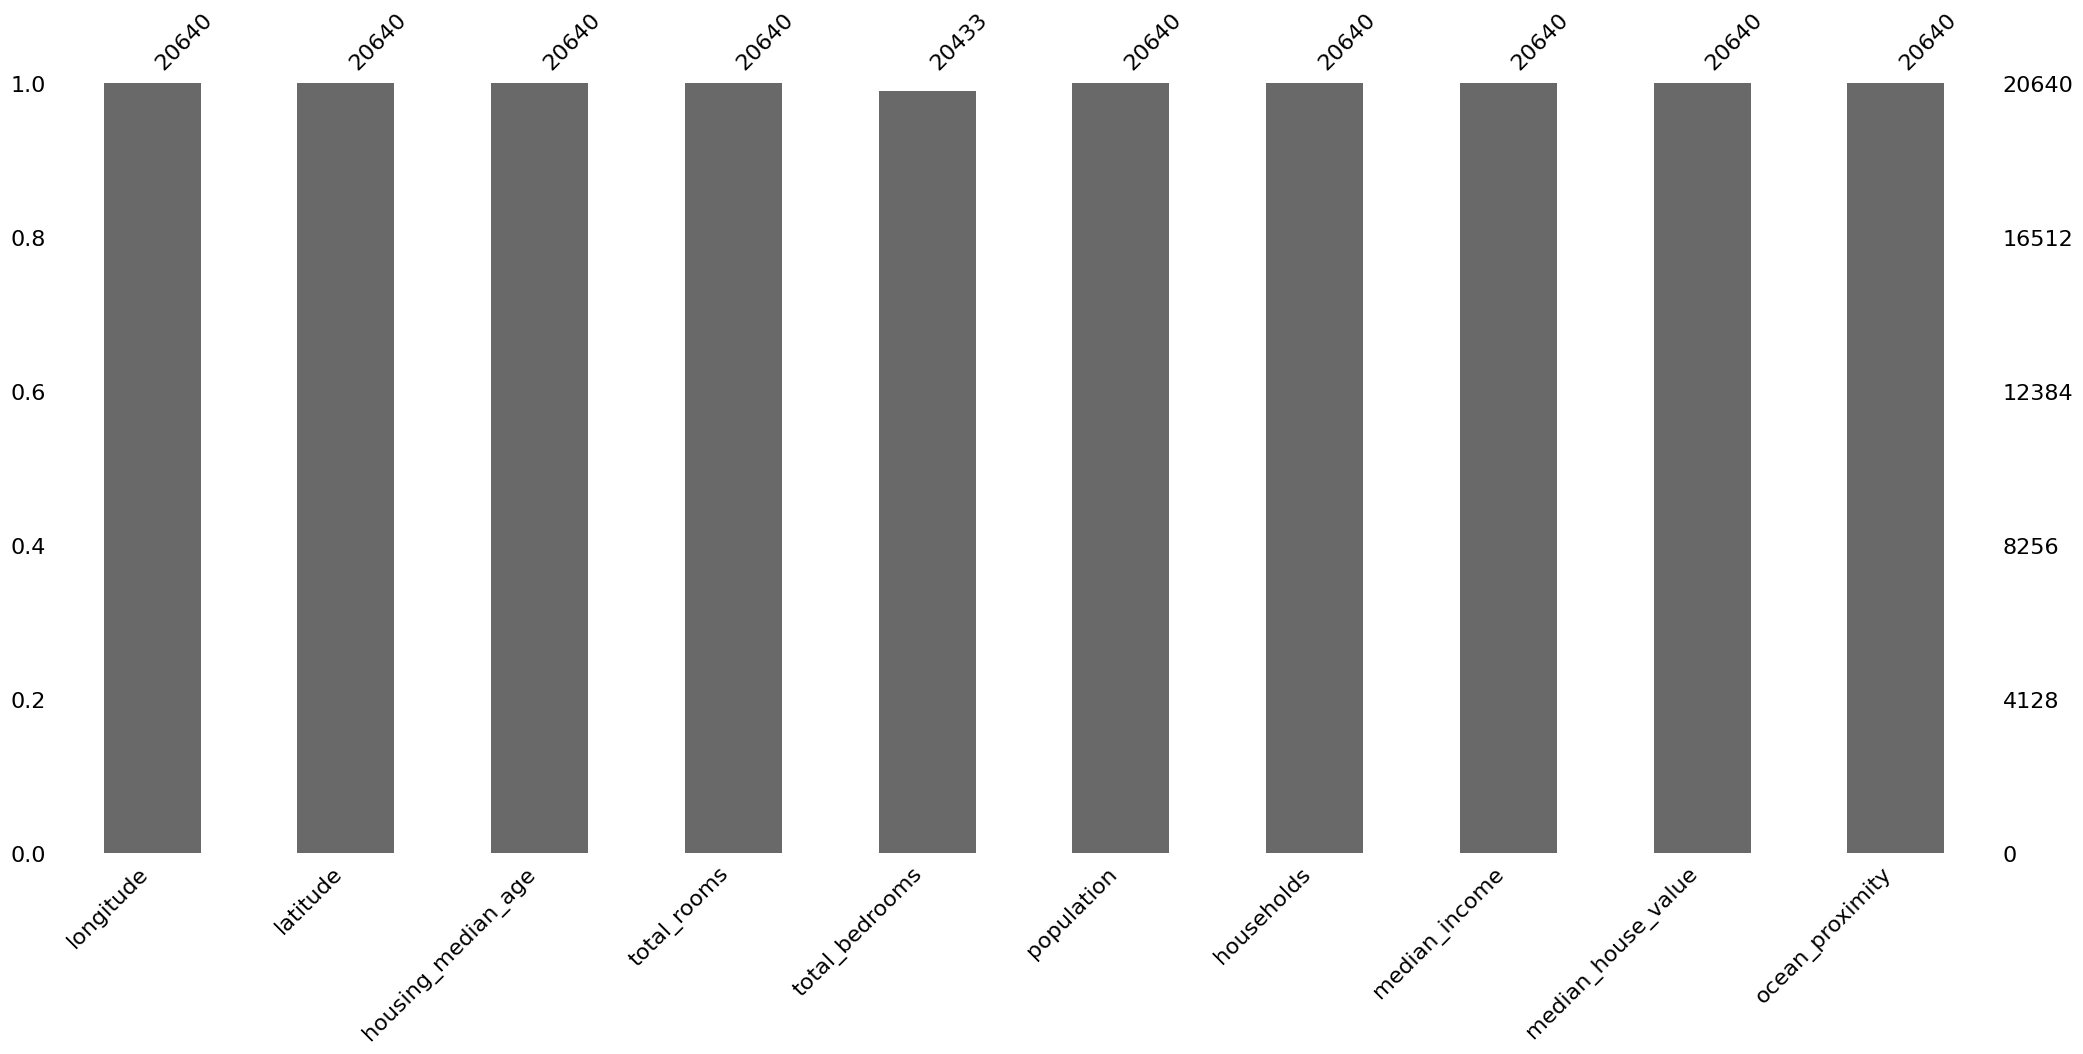

In [163]:
## show null values using missingno ()
missingno.bar(df_housing);

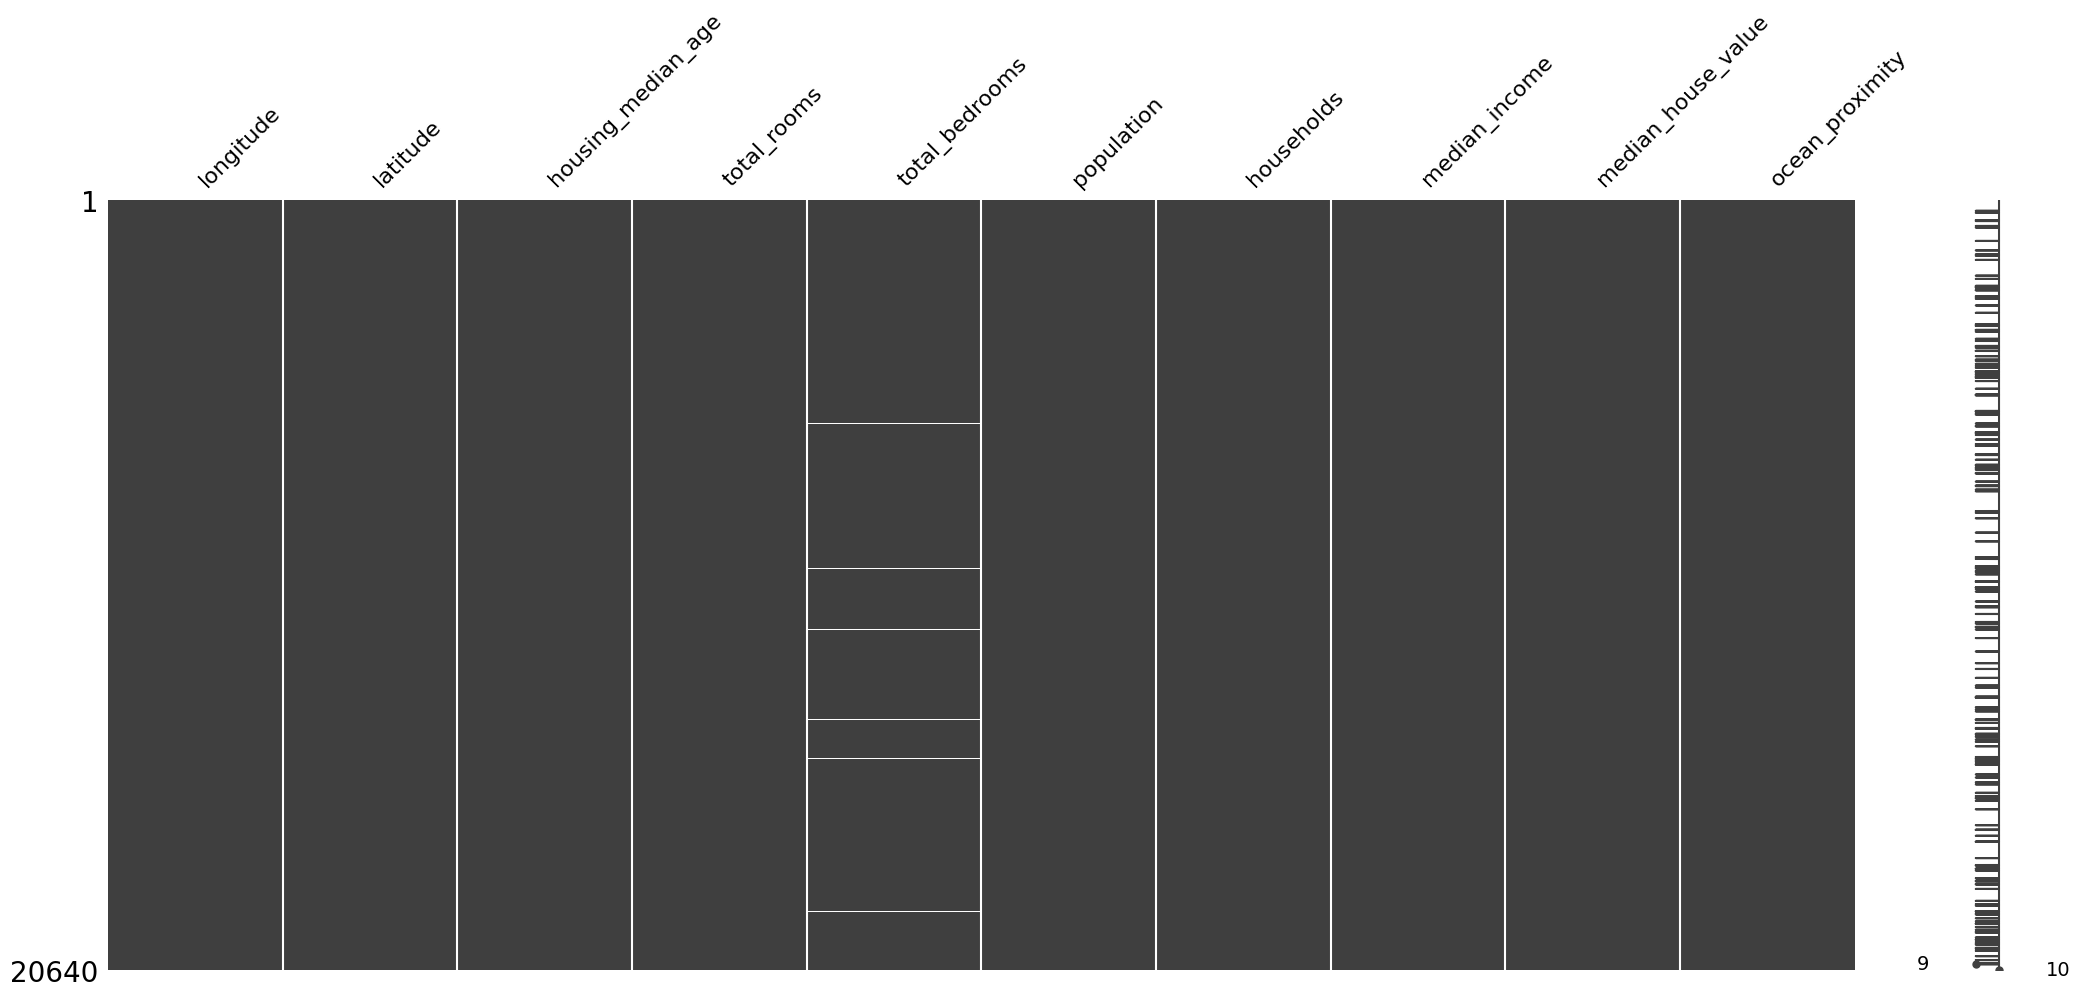

In [164]:
## show position of null values
missingno.matrix(df_housing);

## Exploratory Data Analysis

#### univariate analysis

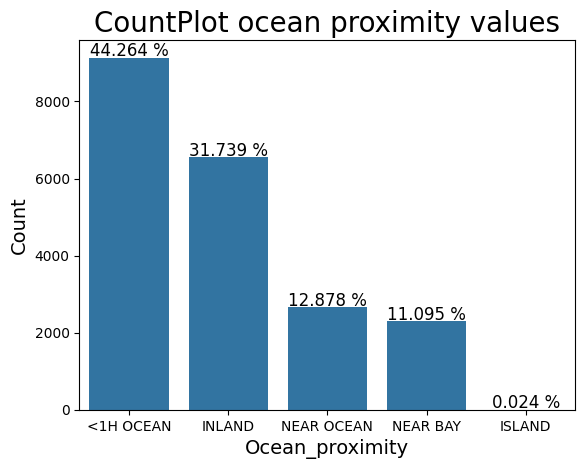

In [165]:
## sample countplot
ocean_proximity_values = df_housing['ocean_proximity'].value_counts().index
sns.countplot(x='ocean_proximity',data=df_housing,order=ocean_proximity_values)

# plot settings
plt.title('CountPlot ocean proximity values',fontsize=20)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Ocean_proximity',fontsize=14)

## total number of rows
total = len(df_housing['ocean_proximity'])

for i, each_value in enumerate(ocean_proximity_values):
    count = df_housing['ocean_proximity'].value_counts()[each_value]
    _percentage = count / total * 100  # Calculate percentage
    percentage = f'{_percentage:.3f} %'
    plt.text(x=i, y=count + 50, s=percentage, ha='center', fontsize=12)

plt.show()

In [166]:
## show unique values in ocean_proximity ['<1H OCEAN']
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [167]:
## modifiy some values in ocean_proximity  
df_housing['ocean_proximity'] = df_housing['ocean_proximity'].apply(lambda x : '1H OCEAN' if x == '<1H OCEAN' else x)

In [168]:
## valuse after modified ['1H OCEAN']
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

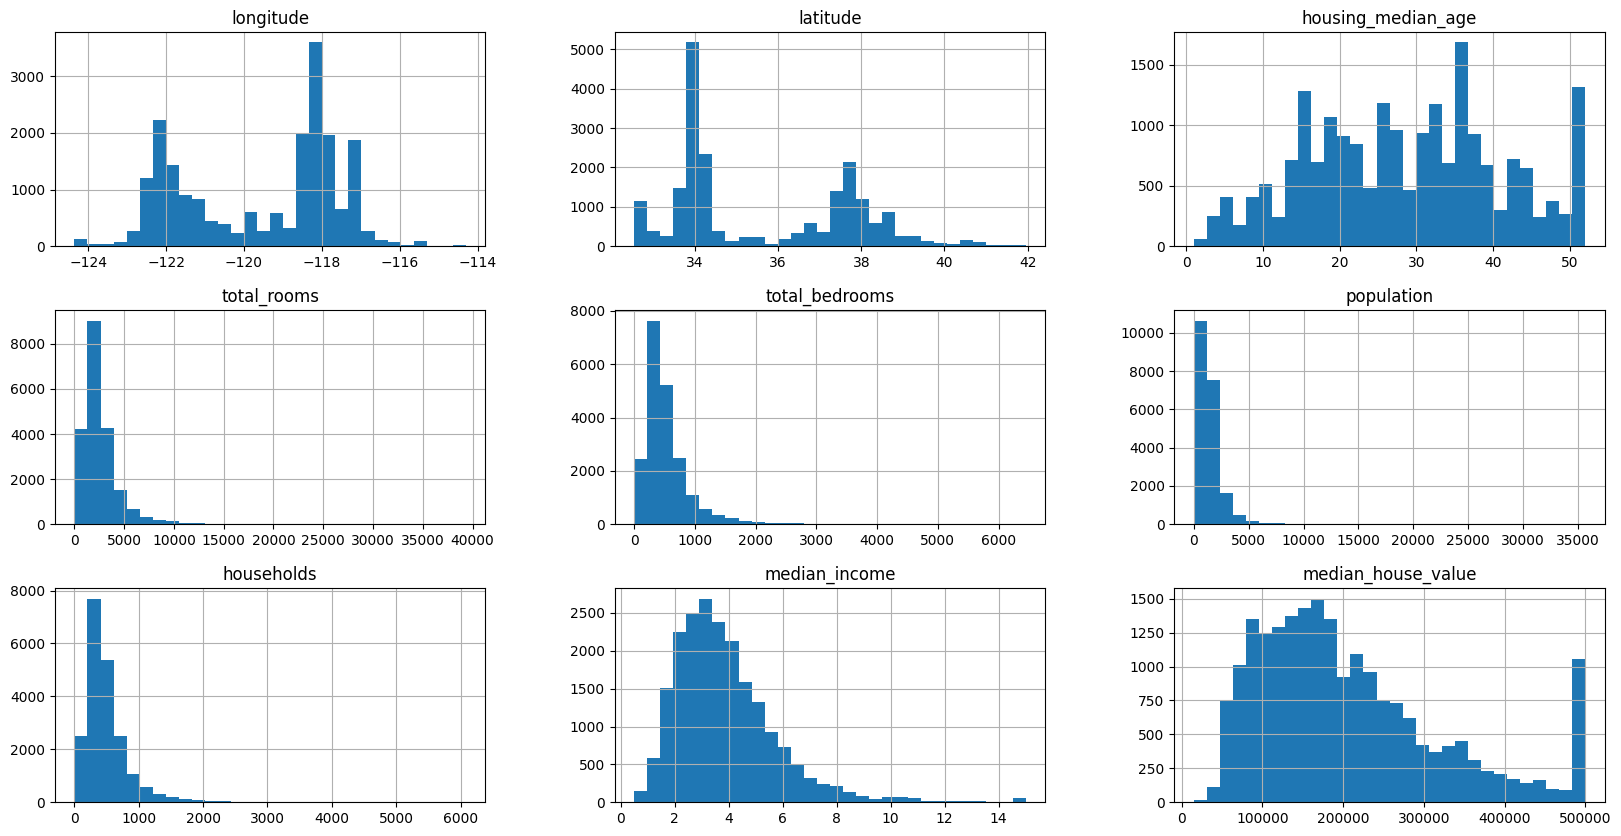

In [169]:
## show histogram for each feature
df_housing.hist(bins=30,figsize=(20,10))
plt.show()

In [170]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [171]:
df_housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

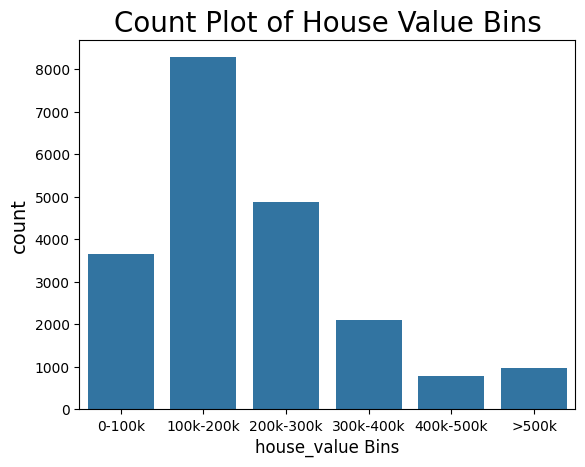

In [172]:
## convert median_house_value Freature to categorical Features and By using countplot I show the denisty of each Bins
median_house_vlue = pd.cut(df_housing['median_house_value'],bins=[-np.inf,100000,200000,300000,400000,500000,np.inf],
                                                   labels=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','>500k'])

plt.title('Count Plot of House Value Bins',fontsize=20)
plt.xlabel('house_value Bins',fontsize=12)
plt.ylabel('count',fontsize=14)
sns.countplot(x=median_house_vlue)
plt.show()

In [173]:
df_housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

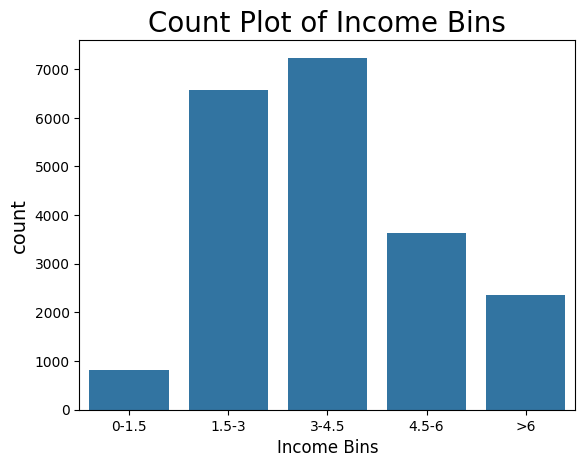

In [174]:
## I convert median_income Freature to categorical Features and By using countplot I show the denisty of each Bins
median_income = pd.cut(x = df_housing['median_income'],bins=[-np.inf,1.5,3,4.5,6,np.inf],
                                                   labels=['0-1.5','1.5-3','3-4.5','4.5-6','>6'])

plt.title('Count Plot of Income Bins',fontsize=20)
plt.xlabel('Income Bins',fontsize=12)
plt.ylabel('count',fontsize=14)
sns.countplot(x=median_income)
plt.show()

#### Bivariate analysis

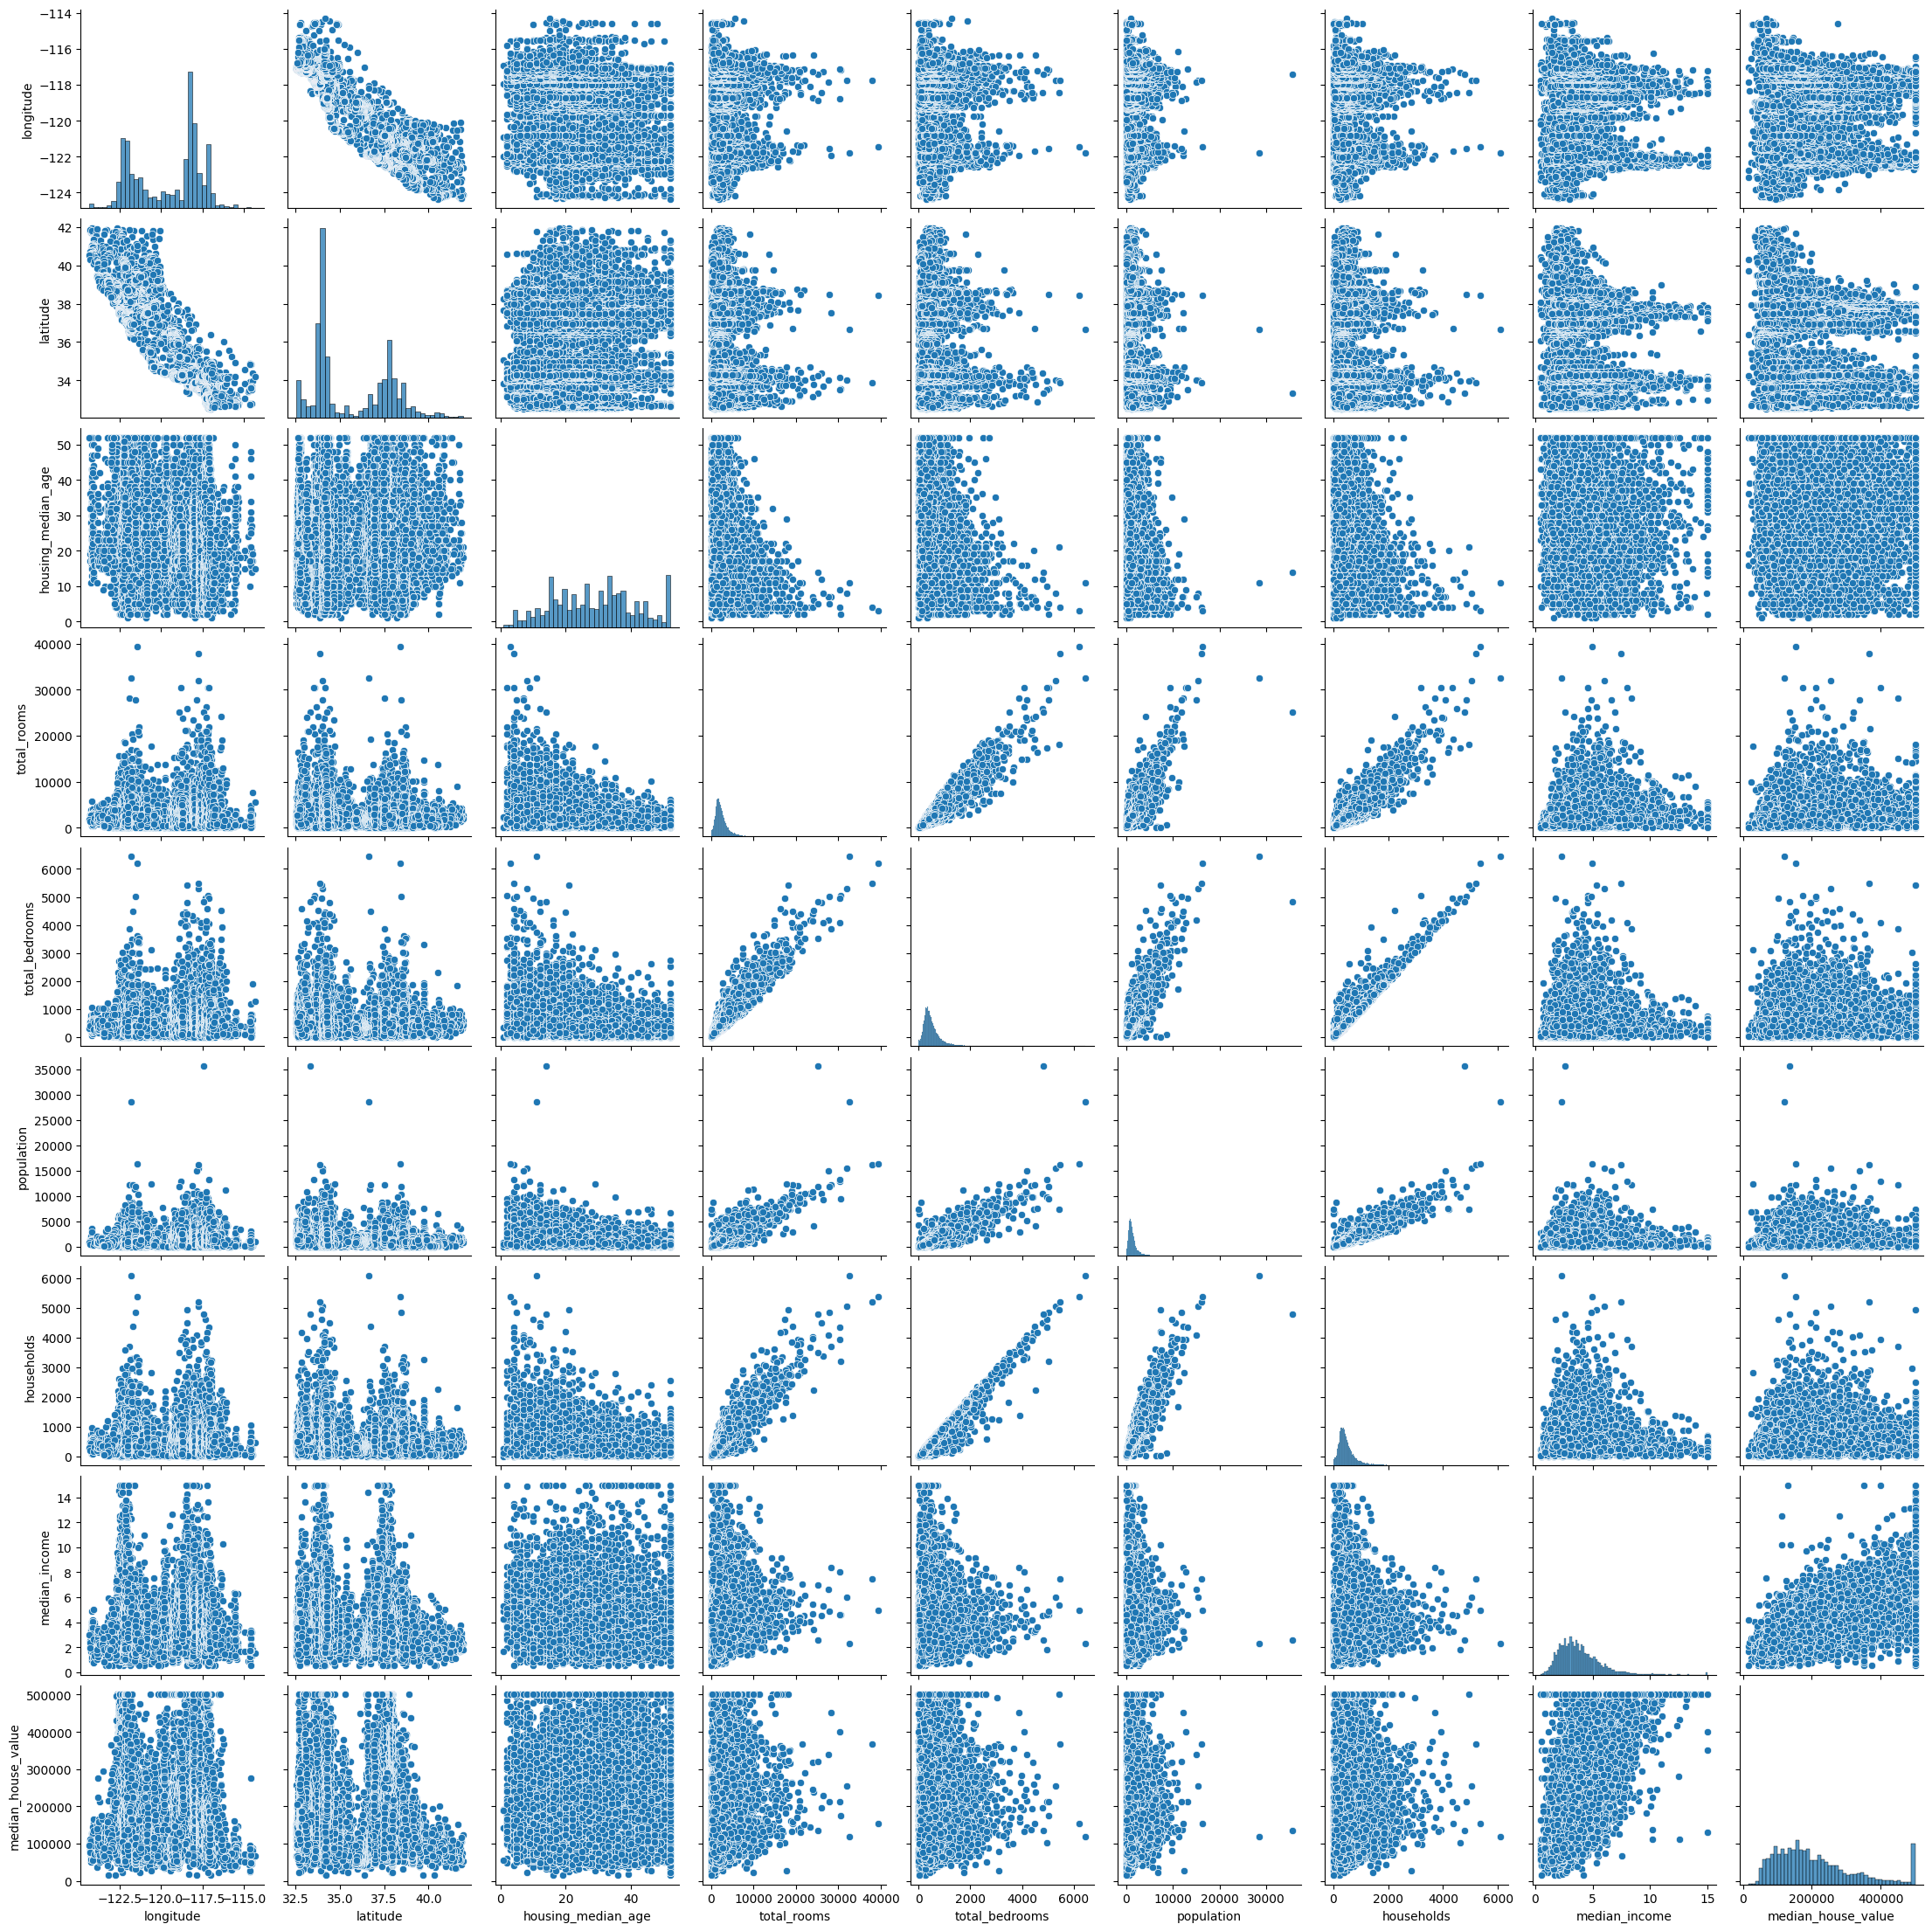

In [175]:
## show correlation between each feature and others
sns.pairplot(data=df_housing)
plt.show()

##### After using pairplot, I find that there exist relation between **median_income** and **median_house_value**

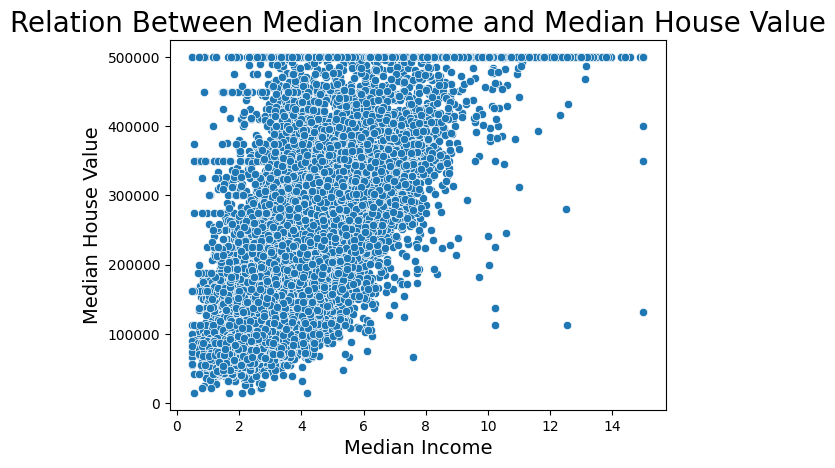

In [176]:
sns.scatterplot(x='median_income',y='median_house_value',data=df_housing) ## default kind = 'scatter'
plt.title('Relation Between Median Income and Median House Value',fontsize=20)
plt.xlabel('Median Income',fontsize=14)
plt.ylabel('Median House Value',fontsize=14)
plt.show()

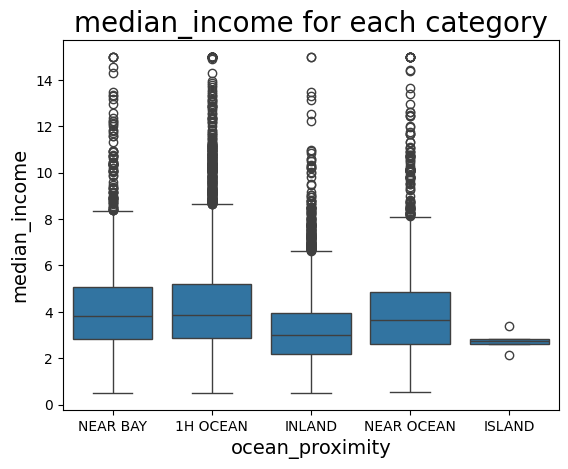

In [177]:
## show median_income for each category
sns.boxplot(x='ocean_proximity',y='median_income',data=df_housing)

plt.title('median_income for each category',fontsize=20)
plt.xlabel('ocean_proximity',fontsize=14)
plt.ylabel('median_income',fontsize=14)

plt.show()

#### After Using boxplot, I notice that there exist many outliers

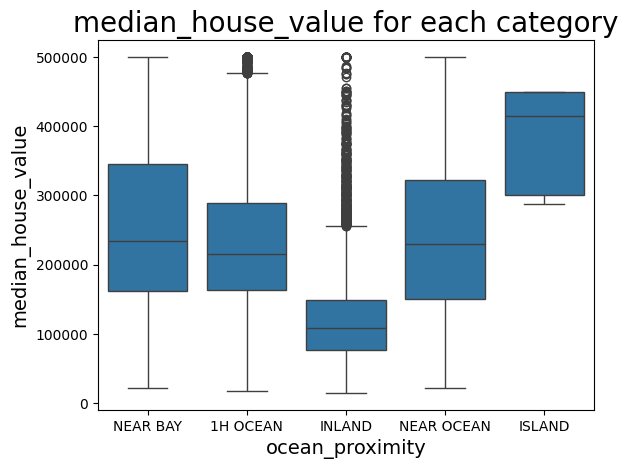

In [178]:
## show median_house_value for each category
sns.boxplot(x='ocean_proximity',y='median_house_value',data=df_housing)

plt.title('median_house_value for each category',fontsize=20)
plt.xlabel('ocean_proximity',fontsize=14)
plt.ylabel('median_house_value',fontsize=14)

plt.show()

#### Multivarite analysis

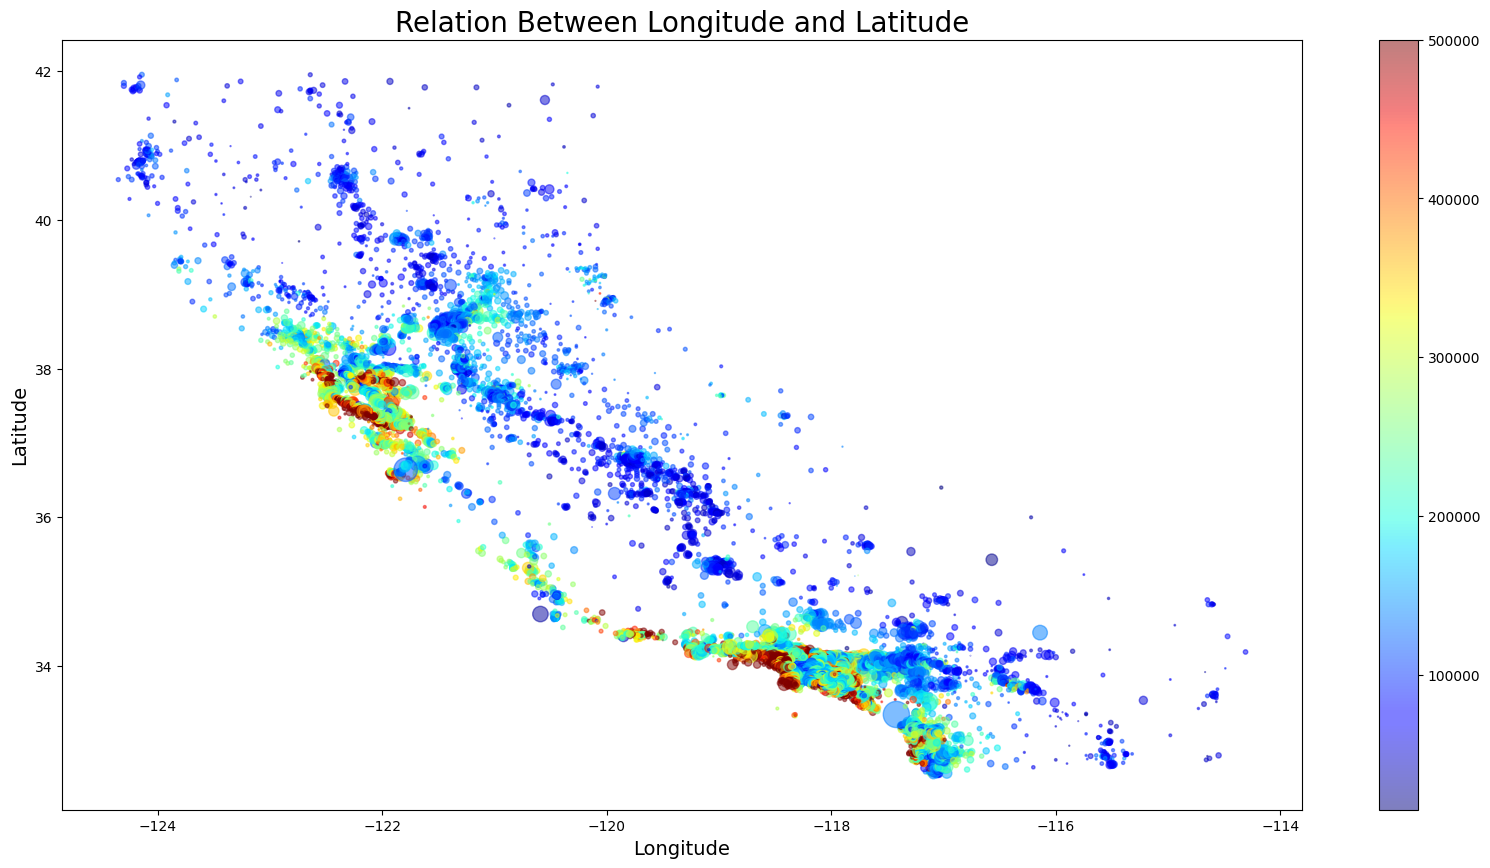

In [179]:
plt.figure(figsize=(20,10))
sc = plt.scatter(x=df_housing['longitude'],y=df_housing['latitude'],s=df_housing['population']/100,
            c=df_housing['median_house_value'],alpha=.5,cmap=plt.get_cmap('jet'))
plt.colorbar(sc)
plt.title('Relation Between Longitude and Latitude',fontsize=20)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.show()

### show the correlation between each feature and others

In [180]:
df_housing.corr(numeric_only=True)

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [181]:
## median_house_value correlate with median income
df_housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

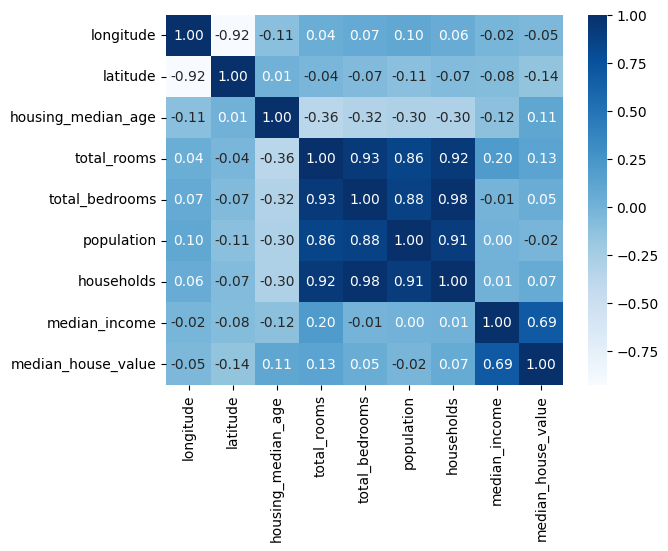

In [182]:
## show correlation using heatmap
sns.heatmap(df_housing.corr(numeric_only=True),annot=True,fmt='.2f',cmap='Blues')
plt.show()

## Feature Engineering

#### Feature Extraction

In [183]:
## Feature Extraction
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedrooms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [184]:
df_housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

#### Split the Dataset

In [185]:
## split the dataset features & target
## target --> median_house_value
x = df_housing.drop(['median_house_value'],axis=1)
y = df_housing['median_house_value']

In [186]:
## split data to train and test and shuffle it
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, random_state=1,test_size=.15)

print('x_train shape -- ',x_train.shape)
print('y_train shape -- ',y_train.shape)
print('x_test shape -- ',x_test.shape)
print('y_test shape -- ',y_test.shape)

x_train shape --  (17544, 12)
y_train shape --  (17544,)
x_test shape --  (3096, 12)
y_test shape --  (3096,)


#### Dealing with Nulls

In [187]:
## show numerical and categorical columns
num_col = [col for col in x_train.columns if x_train[col].dtype in ['int32','int64','float32','float64']]
categ_col = [col for col in x_train.columns if x_train[col].dtype not in ['int32','int64','float32','float64']]

print('Numerical Columns : ',num_col)
print('Categorical Columns : ',categ_col)

Numerical Columns :  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_rooms', 'population_per_household']
Categorical Columns :  ['ocean_proximity']


In [188]:
## fill null value with median 
imputer = SimpleImputer(strategy='median')
# imputer.fit(df_housing[num_col])

# x_train = imputer.transform(df_housing[num_col])
# x_test = imputer.transform(df_housing[num_col])

In [189]:
## median for each numerical columns
# imputer.statistics_

In [190]:
## median for each numerical columns
df_housing[num_col].median()

longitude                   -118.490000
latitude                      34.260000
housing_median_age            29.000000
total_rooms                 2127.000000
total_bedrooms               435.000000
population                  1166.000000
households                   409.000000
median_income                  3.534800
rooms_per_household            5.229129
bedrooms_per_rooms             0.203162
population_per_household       2.818116
dtype: float64

#### Standardize the Numerical Features

In [191]:
scaler = StandardScaler()

# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [192]:
# scaler.mean_

In [193]:
df_housing[num_col].mean()

longitude                   -119.569704
latitude                      35.631861
housing_median_age            28.639486
total_rooms                 2635.763081
total_bedrooms               537.870553
population                  1425.476744
households                   499.539680
median_income                  3.870671
rooms_per_household            5.429000
bedrooms_per_rooms             0.213039
population_per_household       3.070655
dtype: float64

#### Pipeline Numerical Features

In [194]:
# ## Pipeline(steps=[()]) 
# num_pipeline = Pipeline(steps=[
#                 ('imputer',SimpleImputer(strategy='median')),
#                 ('scaler',StandardScaler())
#                 ])
# x_train_num = num_pipeline.fit_transform(x_train[num_col])
# x_test_num = num_pipeline.transform(x_test[num_col])

In [195]:
x_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17210    -119.71     34.43                18.0       1170.0           372.0   
19599    -120.93     37.56                17.0       1812.0           361.0   
4664     -118.30     34.05                46.0       1386.0           457.0   
9692     -121.65     36.69                21.0       7884.0          2011.0   
10766    -117.90     33.63                26.0       1632.0           376.0   
...          ...       ...                 ...          ...             ...   
10955    -117.88     33.76                17.0       1768.0           474.0   
17289    -119.63     34.42                42.0       1765.0           263.0   
5192     -118.26     33.93                42.0       1433.0           295.0   
12172    -117.16     33.73                10.0       2381.0           454.0   
235      -122.20     37.79                35.0       1802.0           459.0   

       population  households  median_income ocean_proximity  \
17210       681.0       346.0         2.1974        1H OCEAN   
19599       672.0       334.0         1.5500          INLAND   
4664       1845.0       485.0         2.1414        1H OCEAN   
9692       4907.0      1919.0         2.7367        1H OCEAN   
10766       598.0       375.0         3.2125        1H OCEAN   
...           ...         ...            ...             ...   
10955      1079.0       436.0         1.7823        1H OCEAN   
17289       753.0       260.0         8.5608        1H OCEAN   
5192        775.0       293.0         1.1326        1H OCEAN   
12172      1323.0       477.0         2.6322          INLAND   
235        1009.0       390.0         2.3036        NEAR BAY   

       rooms_per_household  bedrooms_per_rooms  population_per_household  
17210             3.381503            0.317949                  1.968208  
19599             5.425150            0.199227                  2.011976  
4664              2.857732            0.329726                  3.804124  
9692              4.108390            0.255074                  2.557061  
10766             4.352000            0.230392                  1.594667  
...                    ...                 ...                       ...  
10955             4.055046            0.268100                  2.474771  
17289             6.788462            0.149008                  2.896154  
5192              4.890785            0.205862                  2.645051  
12172             4.991614            0.190676                  2.773585  
235               4.620513            0.254717                  2.587179  

[17544 rows x 12 columns]

#### Dealing With Categorical Features

In [196]:
# ## using label encoder
# label_encoder = LabelEncoder()
# label_encoder.fit(np.squeeze(x_train[categ_col].values))

# x_train_encodded = label_encoder.transform(np.squeeze(x_train[categ_col].values))
# x_test_encodded = label_encoder.transform(np.squeeze(x_test[categ_col].values))


In [197]:
# ## using one hot encoder
# ohe = OneHotEncoder(sparse_output=False)
# ohe.fit(x_train[categ_col].values)

# x_train_encodded = ohe.transform(x_train[categ_col].values)
# x_test_encodded = ohe.transform(x_test[categ_col].values)


In [198]:
# x_train_encodded

#### Pipeline Categorical Features

In [199]:
# ## Pipeline(steps=[()]) 
# categ_pipeline = Pipeline(steps=[
#                 ('imputer',SimpleImputer(strategy='most_frequent')),
#                 ('ohe',OneHotEncoder(sparse_output=False))
#                 ])
# x_train_encodded = num_pipeline.fit_transform(x_train[categ_col])
# x_test_encodded = num_pipeline.transform(x_test[categ_col])

In [200]:
# x_train_encodded

#### Make Pipeline For categorical Features and Numerical Features 

In [201]:
num_pipeline = Pipeline(steps=[
                ('selector',DataFrameSelector(num_col)),
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
                ])
categ_pipeline = Pipeline(steps=[
                ('selector',DataFrameSelector(categ_col)),
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('ohe',OneHotEncoder(sparse_output=False))
                ])
total_pipline = FeatureUnion(transformer_list=[
                                ('num',num_pipeline),
                                ('categ',categ_pipeline)
                                ])

x_train_final = total_pipline.fit_transform(x_train)
x_test_final = total_pipline.transform(x_test)

In [202]:
print('x_train_final shape -- ',x_train_final.shape)
print('x_test_final shape -- ',x_test_final.shape)

x_train_final shape --  (17544, 16)
x_test_final shape --  (3096, 16)


In [203]:
print('y_train shape -- ',y_train.shape)
print('y_test shape -- ',y_test.shape)

y_train shape --  (17544,)
y_test shape --  (3096,)


#### **Building Machine Learning Model**

#### 1 - Linear Regression Model

In [218]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_final, y_train)

LinearRegression()

In [219]:
lin_reg.coef_, lin_reg.intercept_

(array([-56154.47221071, -56558.70666641,  13768.04012527,   5893.88704072,
          3533.60674264, -45715.42691513,  41175.02744989,  78397.44149018,
          7166.86409241,  16324.07777814,    848.06447736, -23204.49631682,
        -57288.2225091 , 124893.18323327, -26398.10438433, -18002.36002301]),
 240895.9992200526)

In [220]:
mse_score_lin = cross_val_score(estimator=lin_reg,X=x_train_final,y=y_train,cv=5,n_jobs=-1,verbose=5,scoring='neg_mean_squared_error')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [221]:
mse_score_lin *= -1
rmse_score_lin = np.sqrt(mse_score_lin)
rmse_score_lin.mean()

68045.31445835535

In [222]:
y_pred_lin = cross_val_predict(estimator=lin_reg,X=x_train_final,y=y_train,n_jobs=-1,method='predict',verbose=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [223]:
np.sqrt(mean_squared_error(y_train, y_pred_lin))

68053.58602273796

#### 2 - SGDRegressor

In [224]:
sgd_reg = SGDRegressor(max_iter=1000,eta0=.001,alpha=.0001,shuffle=True)
sgd_reg.fit(x_train_final, y_train)

SGDRegressor(eta0=0.001)

In [225]:
mse_score_sgd = cross_val_score(estimator=sgd_reg,X=x_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')

In [226]:
mse_score_sgd *= -1
rmse_score_sgd = np.sqrt(mse_score_sgd)
rmse_score_sgd.mean()

68122.0378937644

In [227]:
y_pred_reg = cross_val_predict(estimator=sgd_reg,X=x_train_final,y=y_train,n_jobs=-1,method='predict')

In [228]:
np.sqrt(mean_squared_error(y_train, y_pred_reg))

68126.62235856813

#### 3 - KNN 

In [235]:
# knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p = 2)
# knn.fit(x_train_final, y_train)

In [234]:
## check scores for this model (RMSE) using (cross validation score)
# mse_score_knn = cross_val_score(estimator=knn,X=x_train_final,y=y_train,cv=5,
#                                 n_jobs=-1,scoring='neg_mean_squared_error')
# mse_score_knn *= -1
# rmse_score_knn = np.sqrt(mse_score_knn)
# rmse_score_knn.mean()


# print(f"RMSE using KNN --{np.round(rmse_score_knn,4)}")
# print(f"Mean of RMSE using KNN -- ,{rmse_score_knn.mean():.4f}")

# y_pred_knn = cross_val_predict(estimator=knn,X=x_train_final,y=y_train,cv=5,
#                                 method='predict',n_jobs=-1)

# rmse_after_pred = np.sqrt(mean_squared_error(y_train, y_pred_knn))
# print(f"RMSE using KNN after prediction -- ,{rmse_after_pred:.4f}")

#### 4 - Random Forest 

In [238]:
forest_reg = RandomForestRegressor(n_estimators=200,max_depth=6,n_jobs=-1,max_features=0.9)
forest_reg.fit(x_train_final,y_train)

RandomForestRegressor(max_depth=6, max_features=0.9, n_estimators=200,
                      n_jobs=-1)

In [242]:
## check scores for this model (RMSE) using (cross validation score)
mse_score_rf = cross_val_score(estimator=forest_reg,X=x_train_final,y=y_train,cv=5,
                                n_jobs=-1,scoring='neg_mean_squared_error')
mse_score_rf *= -1
rmse_score_rf = np.sqrt(mse_score_rf)
rmse_score_rf.mean()


print(f"RMSE using Random Forest --{np.round(rmse_score_rf,4)}")
print(f"Mean of RMSE using Random Forest -- {rmse_score_rf.mean():.4f}")

y_pred_rf = cross_val_predict(estimator=forest_reg,X=x_train_final,y=y_train,cv=5,
                                method='predict',n_jobs=-1)

print('-' * 100)
rmse_after_pred = np.sqrt(mean_squared_error(y_train, y_pred_rf))
print(f"RMSE using Random Forest after prediction -- {rmse_after_pred:.4f}")

RMSE using Random Forest --[58952.1772 60204.3263 60812.0564 58996.9176 59962.8601]
Mean of RMSE using Random Forest -- 59785.6675
----------------------------------------------------------------------------------------------------
RMSE using Random Forest after prediction -- 59770.5979


#### Tunning Random Forest Using RandomizedSearchCV

In [251]:
parameters_random_forests = {
    'n_estimators' : np.arange(100,500,50),
    'max_depth' : np.arange(6,12,2),
    'max_features' : np.arange(.5,1,.1)
}

search_random_forest = RandomizedSearchCV(estimator=forest_reg,
                                          param_distributions=parameters_random_forests, n_iter=10,
                                          scoring='neg_mean_squared_error',cv = 5, verbose = 10 )
search_random_forest.fit(x_train_final, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=10, max_features=0.7, n_estimators=300...........
[CV 1/5; 1/10] END max_depth=10, max_features=0.7, n_estimators=300;, score=-2717698658.104 total time=   1.5s
[CV 2/5; 1/10] START max_depth=10, max_features=0.7, n_estimators=300...........
[CV 2/5; 1/10] END max_depth=10, max_features=0.7, n_estimators=300;, score=-2708510589.422 total time=   1.7s
[CV 3/5; 1/10] START max_depth=10, max_features=0.7, n_estimators=300...........
[CV 3/5; 1/10] END max_depth=10, max_features=0.7, n_estimators=300;, score=-2704376842.254 total time=   1.7s
[CV 4/5; 1/10] START max_depth=10, max_features=0.7, n_estimators=300...........
[CV 4/5; 1/10] END max_depth=10, max_features=0.7, n_estimators=300;, score=-2709661821.117 total time=   1.7s
[CV 5/5; 1/10] START max_depth=10, max_features=0.7, n_estimators=300...........
[CV 5/5; 1/10] END max_depth=10, max_features=0.7, n_estimators=300;, score=-2751570652.78

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6,
                                                   max_features=0.9,
                                                   n_estimators=200,
                                                   n_jobs=-1),
                   param_distributions={'max_depth': array([ 6,  8, 10]),
                                        'max_features': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   scoring='neg_mean_squared_error', verbose=10)

In [254]:
search_random_forest.best_params_

{'n_estimators': 300, 'max_features': 0.7, 'max_depth': 10}

In [256]:
best_forest = search_random_forest.best_estimator_
best_forest

RandomForestRegressor(max_depth=10, max_features=0.7, n_estimators=300,
                      n_jobs=-1)

In [259]:
## check scores for this model (RMSE) using (cross validation score)
mse_score_forest = cross_val_score(estimator=best_forest,X=x_train_final,y=y_train,cv=5,
                                n_jobs=-1,scoring='neg_mean_squared_error')
mse_score_forest *= -1
rmse_score_forest = np.sqrt(mse_score_forest)
rmse_score_forest.mean()


print(f"RMSE using Tunning Random Forest --{np.round(rmse_score_forest,4)}")
print(f"Mean of RMSE using Tunning Random Forest -- {rmse_score_forest.mean():.4f}")

y_pred_forest = cross_val_predict(estimator=best_forest,X=x_train_final,y=y_train,cv=5,
                                method='predict',n_jobs=-1)

print('-' * 100)
rmse_after_pred = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f"RMSE after prediction using Tunning Random Forest -- {rmse_after_pred:.4f}")

RMSE using Tunning Random Forest --[52290.8281 52135.3626 51974.5361 52049.6214 52549.9489]
Mean of RMSE using Tunning Random Forest -- 52200.0594
----------------------------------------------------------------------------------------------------
RMSE after prediction using Tunning Random Forest -- 52224.4424


In [278]:
## check importance for each feature
feature_importance = best_forest.feature_importances_
print(f'Importance of All Features : \n',feature_importance)
print('-'*100)
print(f'Importance of Numerical Features : \n',feature_importance[:11])

Importance of All Features : 
 [4.90547018e-02 4.39690355e-02 3.60607851e-02 6.20736127e-03
 5.93482315e-03 5.65828060e-03 5.43883929e-03 4.75349714e-01
 2.33228804e-02 3.78878576e-02 1.17895536e-01 1.83572506e-03
 1.88553586e-01 1.77466455e-04 6.71506679e-04 1.98190179e-03]
----------------------------------------------------------------------------------------------------
Importance of Numerical Features : 
 [0.0490547  0.04396904 0.03606079 0.00620736 0.00593482 0.00565828
 0.00543884 0.47534971 0.02332288 0.03788786 0.11789554]


In [280]:
## check importance for each feature
importance_of_each_feature = {}
for name, importance in zip(num_col, feature_importance[:11]):
    importance_of_each_feature[name] = importance
importance_of_each_feature

{'longitude': 0.049054701833447366,
 'latitude': 0.04396903551977753,
 'housing_median_age': 0.0360607851280496,
 'total_rooms': 0.006207361269431833,
 'total_bedrooms': 0.005934823154451624,
 'population': 0.005658280599087412,
 'households': 0.005438839291927753,
 'median_income': 0.4753497135080304,
 'rooms_per_household': 0.023322880378799763,
 'bedrooms_per_rooms': 0.03788785762315887,
 'population_per_household': 0.11789553616468156}

In [326]:
feature_importance = pd.DataFrame({'Feature' : importance_of_each_feature.keys(),
              'Importance':importance_of_each_feature.values()})
feature_importance = feature_importance.sort_values('Importance',ascending=False)

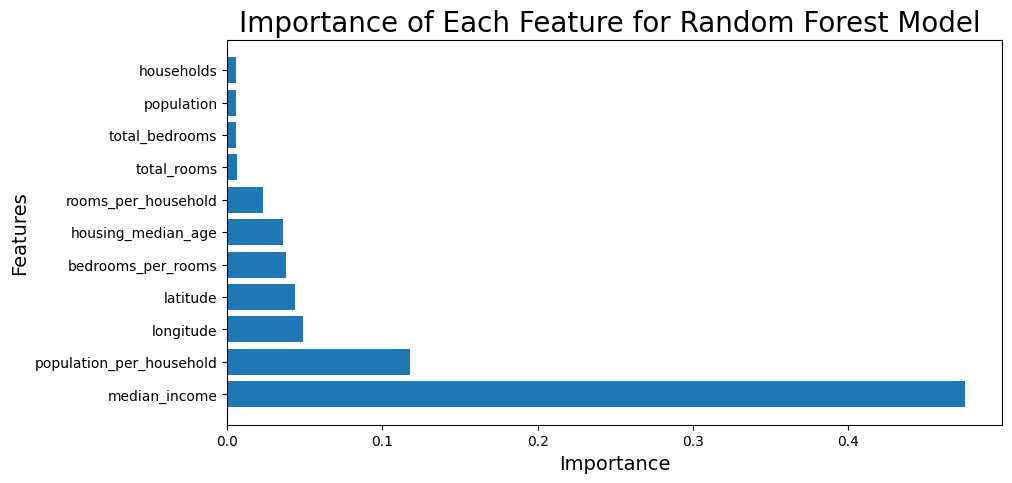

In [341]:
## Show Importance using plotting
plt.figure(figsize=(10,5))
plt.barh(y=feature_importance['Feature'],width=feature_importance['Importance'])

plt.title('Importance of Each Feature for Random Forest Model ',fontsize = 20)
plt.ylabel('Features',fontsize=14)
plt.xlabel('Importance',fontsize=14)

plt.show()

#### 4 - XGBoost

In [296]:
xgb_reg = XGBRegressor(n_estimators = 100, learning_rate = .1, max_depth = 6, subsample = .9)
xgb_reg.fit(x_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [297]:
## check scores for this model (RMSE) using (cross validation score)
mse_score_xgb = cross_val_score(estimator=xgb_reg,X=x_train_final,y=y_train,cv=5,
                                n_jobs=-1,scoring='neg_mean_squared_error')
mse_score_xgb *= -1
rmse_score_xgb = np.sqrt(mse_score_xgb)
rmse_score_xgb.mean()


print(f"RMSE using Tunning Random Forest --{np.round(rmse_score_xgb,4)}")
print(f"Mean of RMSE using Tunning Random Forest -- {rmse_score_xgb.mean():.4f}")

y_pred_xgb = cross_val_predict(estimator=xgb_reg,X=x_train_final,y=y_train,cv=5,
                                method='predict',n_jobs=-1)

print('-' * 100)
rmse_after_pred = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f"RMSE after prediction using Tunning Random Forest -- {rmse_after_pred:.4f}")

RMSE using Tunning Random Forest --[47289.0233 46644.5688 46710.7464 47062.8973 47830.6907]
Mean of RMSE using Tunning Random Forest -- 47107.5853
----------------------------------------------------------------------------------------------------
RMSE after prediction using Tunning Random Forest -- 47109.5173


#### Tunning XGBoost Using GridSearchCV

In [309]:
parameters_xgboost = {
    'n_estimators' : np.arange(100,200,50),
    'max_depth' : np.arange(6,12,2),
    'subsample' : np.arange(.5,1,.2),
    'learning_rate' : np.arange(.001,.1,.03)
}
n_iter = len(np.arange(100,200,50)) * len(np.arange(6,12,2)) * len(np.arange(.5,1,.2)) * len(np.arange(.001,.1,.03))
print('Number of Iterations : ',n_iter)

search_xgboost = GridSearchCV(estimator=xgb_reg,
                              param_grid=parameters_xgboost,
                              scoring='neg_mean_squared_error',cv = 5, verbose = 10 )
search_xgboost.fit(x_train_final, y_train)

Number of Iterations :  72
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START learning_rate=0.001, max_depth=6, n_estimators=100, subsample=0.5
[CV 1/5; 1/72] END learning_rate=0.001, max_depth=6, n_estimators=100, subsample=0.5;, score=-11190777611.219 total time=   0.2s
[CV 2/5; 1/72] START learning_rate=0.001, max_depth=6, n_estimators=100, subsample=0.5
[CV 2/5; 1/72] END learning_rate=0.001, max_depth=6, n_estimators=100, subsample=0.5;, score=-12197622180.358 total time=   0.1s
[CV 3/5; 1/72] START learning_rate=0.001, max_depth=6, n_estimators=100, subsample=0.5
[CV 3/5; 1/72] END learning_rate=0.001, max_depth=6, n_estimators=100, subsample=0.5;, score=-11699712110.898 total time=   0.1s
[CV 4/5; 1/72] START learning_rate=0.001, max_depth=6, n_estimators=100, subsample=0.5
[CV 4/5; 1/72] END learning_rate=0.001, max_depth=6, n_estimators=100, subsample=0.5;, score=-11298056762.014 total time=   0.1s
[CV 5/5; 1/72] START learning_rate=0.001, max_d

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': array([0.001, 0.031, 0.061, 0.091]),
                         'max_depth': array([ 6,  8, 10]),
                         'n_estimators': array([100, 150]),
                         'subsample': array([0.5, 0.7, 0.9])},
             scoring='neg_mean_squared_error', verbose=10)

In [314]:
## best parameters
search_xgboost.best_params_

{'learning_rate': 0.091,
 'max_depth': 8,
 'n_estimators': 150,
 'subsample': 0.8999999999999999}

In [319]:
best_xgboost = search_xgboost.best_estimator_
best_xgboost.fit(x_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.091, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [320]:
## check scores for this model (RMSE) using (cross validation score)
mse_score_best_xgb = cross_val_score(estimator=best_xgboost,X=x_train_final,y=y_train,cv=5,
                                n_jobs=-1,scoring='neg_mean_squared_error')
mse_score_best_xgb *= -1
rmse_score_best_xgb = np.sqrt(mse_score_best_xgb)
rmse_score_best_xgb.mean()


print(f"RMSE using Tunning Random Forest --{np.round(rmse_score_best_xgb,4)}")
print(f"Mean of RMSE using Tunning Random Forest -- {rmse_score_best_xgb.mean():.4f}")

y_pred_best_xgb = cross_val_predict(estimator=best_xgboost,X=x_train_final,y=y_train,cv=5,
                                method='predict',n_jobs=-1)

print('-' * 100)
rmse_after_pred = np.sqrt(mean_squared_error(y_train, y_pred_best_xgb))
print(f"RMSE after prediction using Tunning Random Forest -- {rmse_after_pred:.4f}")

RMSE using Tunning Random Forest --[46392.2986 45530.7448 44809.1035 46198.9418 46080.9256]
Mean of RMSE using Tunning Random Forest -- 45802.4028
----------------------------------------------------------------------------------------------------
RMSE after prediction using Tunning Random Forest -- 45805.9747


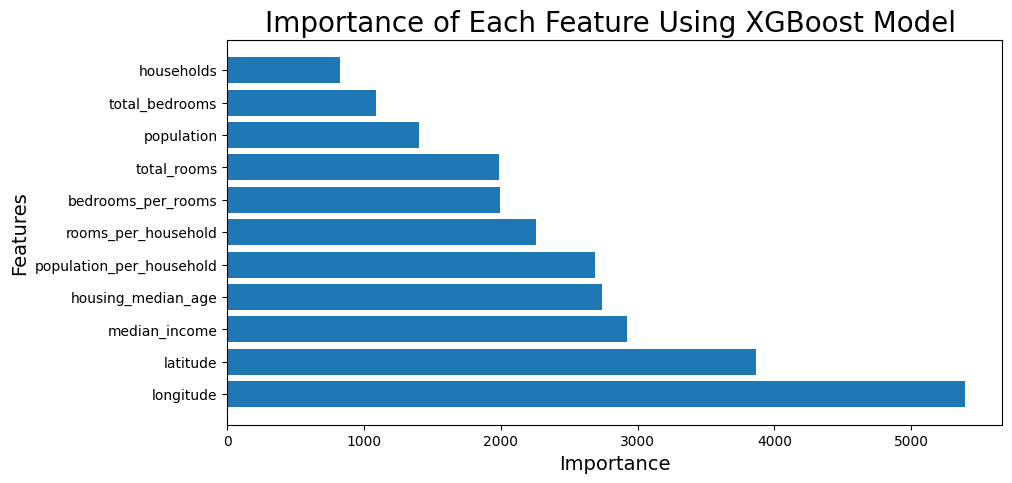

In [376]:
## Using XGBoost to get Feature's Importance
feat_import_xgb = best_xgboost.get_booster().get_score(importance_type = 'weight')
feature_importance_xgb = pd.DataFrame.from_dict(feat_import_xgb,orient='index').reset_index()
feature_importance_xgb = feature_importance_xgb.rename(columns={'index':'Features',0:'Importance'})
feature_importance_xgb = feature_importance_xgb[:11]
feature_importance_xgb['Features'] = num_col
feature_importance_xgb = feature_importance_xgb.sort_values('Importance',ascending=False)
feature_importance_xgb

## Show Importance using plotting
plt.figure(figsize=(10,5))
plt.barh(y=feature_importance_xgb['Features'],width=feature_importance_xgb['Importance'])

plt.title('Importance of Each Feature Using XGBoost Model ',fontsize = 20)
plt.ylabel('Features',fontsize=14)
plt.xlabel('Importance',fontsize=14)

plt.show()

## Noticed That The best Model is XGBoost Thus, I used.

### Download The Best Model 

In [385]:
## download modle usnig joblib
joblib.dump(best_xgboost,'model.pkl')

['model.pkl']

### import pretrained model

In [387]:
## load model
model = joblib.load('model.pkl')

### Inference On Test Dataset

In [390]:
y_pred_final = model.predict(x_test_final)

In [396]:
## metric RMSE
np.sqrt(mean_squared_error(y_test,y_pred_final))

44872.137797208925